# Build Prediction Models with ARIMA

**Add a brief introduction of ARIMA**

Finish this later

In [19]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

In [20]:
# Read training and testing datasets
df_train = pd.read_csv("../data/train_dataset.csv", parse_dates=['date'])
df_test = pd.read_csv("../data/test_dataset.csv", parse_dates=['date'])

df_train.head()

,date,spy_close,spy_return,spy_direction,daily_sentiment_score,daily_sentiment_label,headline_count
0,2018-03-02,239.550018,0.005155,1,-0.099900,negative,6
1,2018-03-05,242.318726,0.011558,1,-0.110300,positive,6
2,2018-03-06,242.932983,0.002535,0,0.227525,positive,4
3,2018-03-07,242.843948,-0.000367,1,-0.125275,negative,8
4,2018-03-08,244.019043,0.004839,1,0.037960,positive,5


## A. Use Only SPY Close Price

In [21]:
# Use Close price as the time-series
train_series = df_train.set_index('date')['spy_close']
test_series = df_test.set_index('date')['spy_close']

print(train_series.head())

date
2018-03-02    239.550018
2018-03-05    242.318726
2018-03-06    242.932983
2018-03-07    242.843948
2018-03-08    244.019043
Name: spy_close, dtype: float64


In [22]:
# Fit ARIMA model on training data
model = ARIMA(train_series, order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Summary of model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              spy_close   No. Observations:                  223
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -642.876
Date:                Tue, 01 Apr 2025   AIC                           1297.753
Time:                        23:40:47   BIC                           1318.169
Sample:                             0   HQIC                          1305.996
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3451      0.036     -9.510      0.000      -0.416      -0.274
ar.L2          0.2466      0.040      6.197      0.000       0.169       0.325
ar.L3          0.1751      0.041      4.285      0.0

/Users/xuefeiyang/finance_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xuefeiyang/finance_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xuefeiyang/finance_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
# Forecast as many steps as in the test set
forecast_steps = len(df_test)

# Forecast future prices
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast with test dates
forecast.index = df_test.index

/Users/xuefeiyang/finance_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/xuefeiyang/finance_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [24]:
# Compare today's forecast vs next day's forecast
predicted_direction = (forecast.shift(-1) > forecast).astype(int)

# Actual direction from test dataset
actual_direction = df_test['spy_direction']

# Remove last row (NaN from shift)
predicted_direction = predicted_direction[:-1]
actual_direction = actual_direction[:-1]

In [25]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(actual_direction, predicted_direction))
print(classification_report(actual_direction, predicted_direction))

Accuracy: 0.41818181818181815
              precision    recall  f1-score   support

           0       0.29      0.40      0.33        20
           1       0.56      0.43      0.48        35

    accuracy                           0.42        55
   macro avg       0.42      0.41      0.41        55
weighted avg       0.46      0.42      0.43        55



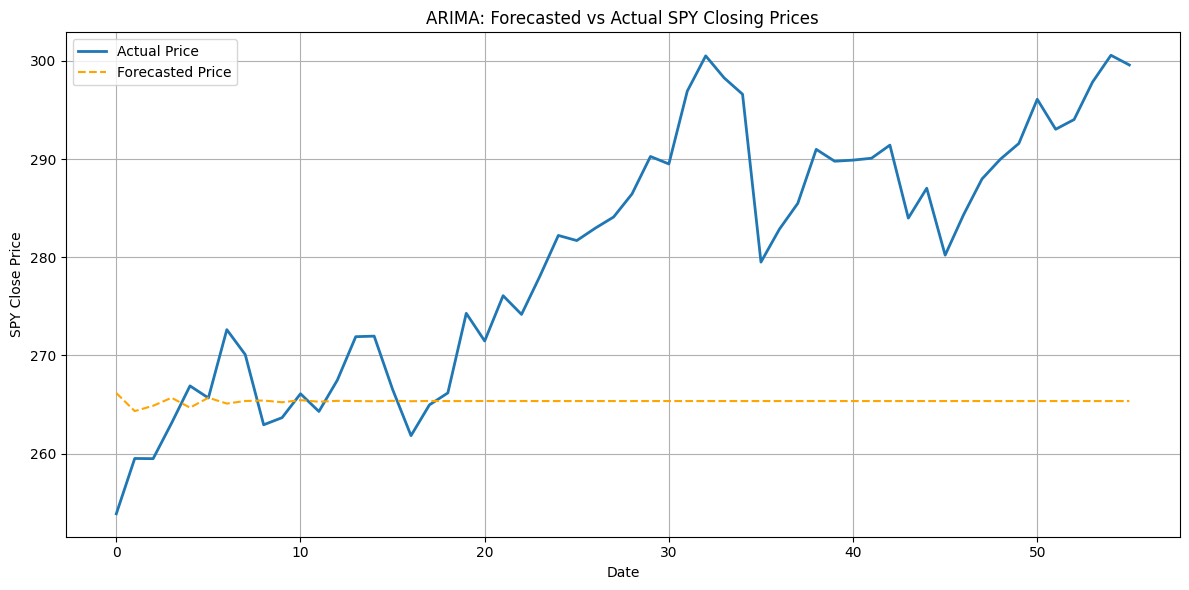

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['spy_close'], label='Actual Price', linewidth=2)
plt.plot(forecast.index, forecast, label='Forecasted Price', linestyle='--', color='orange')
plt.title('ARIMA: Forecasted vs Actual SPY Closing Prices')
plt.xlabel('Date')
plt.ylabel('SPY Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

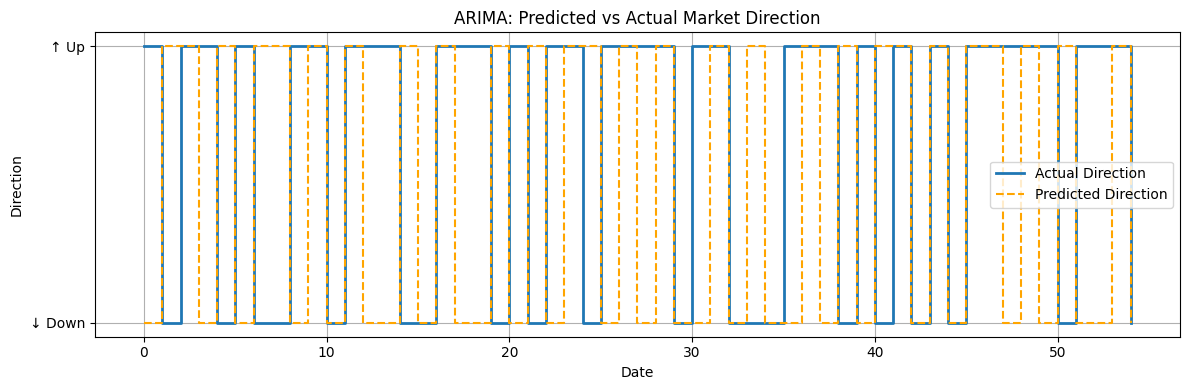

In [27]:
# Truncate test index to match predicted_direction
direction_index = actual_direction.index

plt.figure(figsize=(12, 4))
plt.plot(direction_index, actual_direction, label='Actual Direction', drawstyle='steps-post', linewidth=2)
plt.plot(direction_index, predicted_direction, label='Predicted Direction', linestyle='--', drawstyle='steps-post', color='orange')
plt.yticks([0, 1], ['↓ Down', '↑ Up'])
plt.title('ARIMA: Predicted vs Actual Market Direction')
plt.xlabel('Date')
plt.ylabel('Direction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Some Comments (Observe More and Improve Later)**

* ARIMA predicts badly
* Hyperparameter not tuned yet (Use cross validation or pmdarima to tune)
* Maybe training data is small
* Maybe ARIMA method is not good for this task (it is commen for ARIMA to predict as flat line)